# About this Project

The idea of this notebook is to follow Keith Galli's video on how to do a sales analysis as a data scientist, using mostly Python with the Pandas library

- Video: https://www.youtube.com/watch?v=eMOA1pPVUc4
- GitHub code and data: https://github.com/KeithGalli/Pandas-Data-Science-Tasks

## Setting up

### Import Necessary Libraries

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Task #1: Merging 12 months of sales into a single file

In [16]:
# this read a csv file
df = pd.read_csv("./DataSet/Sales_April_2019.csv")

# This read all the files from the list directory 
files = [file for file in os.listdir('./DataSet')]

# empty data frame
all_months_data = pd.DataFrame()

# go through the files and append to the DataFrame
for file in files:
    df = pd.read_csv("./DataSet/"+file)
    all_months_data = pd.concat([all_months_data, df])

# turn into a csv file
all_months_data.to_csv("all_data.csv", index = False)


In [17]:
all_data = pd.read_csv("./all_data.csv")

### Task #2: Clean up a bit of the data!

In [18]:
# how to find the NaN lines:
nan_df = all_data[all_data.isna().any(axis=1)]

In [19]:
# drop NaN rows
all_data = all_data.dropna(how='all')


### Task #3: Create columns

#### Add MonthColumn

In [20]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Month'] = all_data['Month'].astype('int')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a sales column

In [21]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

####  Add City Column

In [24]:
# using the .apply() method
# all_data['City Name'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2])
# all_data['State'] = all_data['State'].apply(lambda x: x.split(' ')[1])
# 
# all_data['City'] = all_data['City Name'] + " - " + all_data['State']
# all_data = all_data.drop(columns='City Name')
# all_data = all_data.drop(columns='State')

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

## Answering Questions

### Question 1: What is the best month for sales? How much was earned in that month?

In [25]:
# How to join and sum the values by month

results = all_data.groupby('Month').sum()

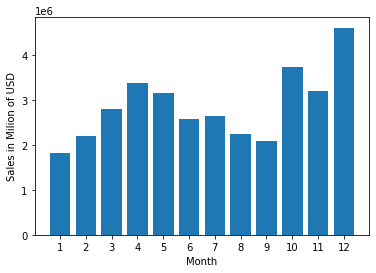

In [26]:
# creating a list for 1 through 12. 
# If I did a code like 'months = all_data.Month.unique()' 
# it would be all off order, and ordering it would do more trouble than good
months = range(1,13)

# Very simple barplot from matplotlib so we can see that the months with a greater value in sales
# are October and December
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Milion of USD')
plt.xlabel('Month')
plt.show()

### Question 2: What US City had the highest number of sales

In [27]:
# Same principle here than before, we group by city just to have the values for sales
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


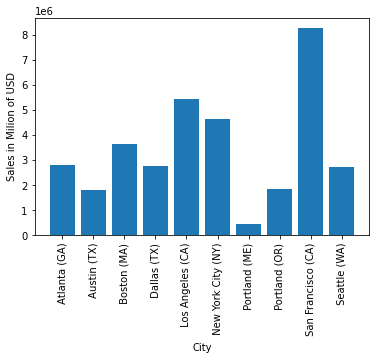

In [29]:
# This is a way of ordering the actual cities with their own bar in the chart
cities = [city for city, df in all_data.groupby('City')]

# plotting the bar chart and realizing the city that purchased the most was San Francisco (CA)
# we can also see that cities with more citzens tend to spend the most
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.ylabel('Sales in Milion of USD')
plt.xlabel('City')
plt.show()

### Question 3: What time should we display advertisement to maximize likelihood of costumer's buying product?

In [30]:
# Creating column time of purchase using datetime formating
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [32]:
# Creating the columns for hour and minutes
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [45]:
# Grouping by hour to see when there are more sales
results = all_data.groupby('Hour').sum()
print(results)

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


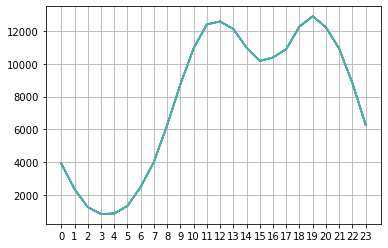

In [33]:
# Same thing here than in the cities, matching the hour with the value
hours = [hour for hour, df in all_data.groupby('Hour')]

# plot a line graph
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

# As we can see, there are two peaks of sales (in $, not in amount of purchases)
# Therefore, we recomendation to advertise around 11AM or 19PM

### Question 4: What products are most often sold together

In [34]:
# creating new df with only orders with more than one product
df = all_data[all_data['Order ID'].duplicated(keep = False)]

# creating a new column with the complete order combined
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# dropping duplicates, now that the combined column is created
df = df[['Order ID', 'Grouped']].drop_duplicates()


df.head()

C:\Users\filip\AppData\Local\Temp/ipykernel_5604/2335584725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [36]:
# here we creat a counter
count = Counter()

# Here we count the combinations, using a coma as a divider
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Here we print the most common combos
for key, value in count.most_common(10):
    print(key, value)
    
# As we can see, the 2 most common combos are phones with charging cables

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why?

In [39]:
# Pretty simple grouping by product showing only the quantity ordered
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

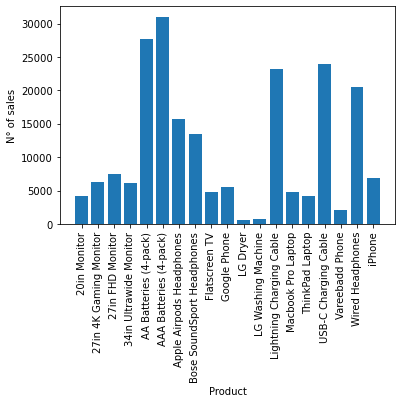

In [40]:
# matching product to amount
products = [product for product, df in all_data.groupby('Product')]

# plotting bar chart
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical')
plt.ylabel('N° of sales')
plt.xlabel('Product')
plt.show()

# realizing the most commonly sold itens are AAA and AA Bateries
# followed by charging cables and wired headphones

In [41]:
# Now we think, maybe the most sold itens are the cheapest ones
# so we check it, seing their prices
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\filip\AppData\Local\Temp/ipykernel_5604/2473478140.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


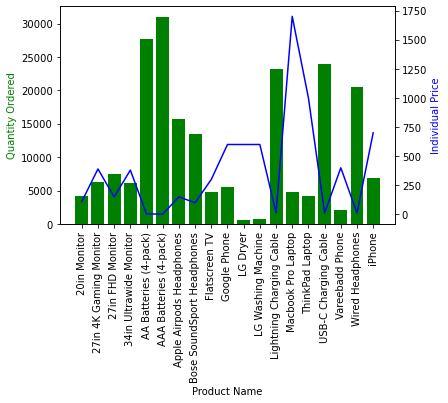

In [42]:
# now we plot a new line chart in the bar chart to see if there's a resemblance 

products = [product for product, df in all_data.groupby('Product')]
prices = all_data.groupby('Product').mean()['Price Each']

# Here we're using matplotlib's subplots
fig, ax1 = plt.subplots()

# creating both graphs
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

# setting parameters
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Individual Price', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical')

plt.show()

# And yes, there are some influence, the most sold itens are all very cheap
# But there also are expensive ones that are selling well
# Therefore there is a connection, but it is not a rule 